# Wordcount

### README de Spark como fuente de datos

In [2]:
textFile = sc.textFile("../../README.md")
textFile

../../README.md MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

### Cuento palabras (flatMap, map, reduceByKey)

In [3]:
wordCounts = \
  textFile.flatMap(lambda line: line.split())\
          .map(lambda word: (word, 1))\
          .reduceByKey(lambda a, b: a+b)
wordCounts

PythonRDD[6] at RDD at PythonRDD.scala:53

### Muestro todas las tuplas (collect)

In [4]:
wordCounts.collect()

[(u'when', 1),
 (u'R,', 1),
 (u'including', 4),
 (u'computation', 1),
 (u'contributing', 1),
 (u'Kubernetes', 1),
 (u'using:', 1),
 (u'guidance', 2),
 (u'Scala,', 1),
 (u'environment', 1),
 (u'only', 1),
 (u'rich', 1),
 (u'Apache', 1),
 (u'sc.parallelize(range(1000)).count()', 1),
 (u'Building', 1),
 (u'IDE,', 1),
 (u'guide,', 1),
 (u'return', 2),
 (u'Enabling', 1),
 (u'Please', 4),
 (u'Try', 1),
 (u'not', 1),
 (u'Spark', 16),
 (u'scala>', 1),
 (u'Contributing', 1),
 (u'cluster.', 1),
 (u'./bin/pyspark', 1),
 (u'params', 1),
 (u'through', 1),
 (u'GraphX', 1),
 (u'guide](http://spark.apache.org/contributing.html)', 1),
 (u'[run', 1),
 (u'A', 1),
 (u'abbreviated', 1),
 (u'For', 3),
 (u'##', 9),
 (u'library', 1),
 (u'see', 4),
 (u'"local"', 1),
 (u'[Apache', 1),
 (u'will', 1),
 (u'#', 1),
 (u'processing,', 1),
 (u'for', 12),
 (u'review', 1),
 (u'[building', 1),
 (u'Maven', 1),
 (u'["Parallel', 1),
 (u'provides', 1),
 (u'print', 1),
 (u'supports', 2),
 (u'built,', 1),
 (u'[params]`.', 1),


### Las 5 palabras que más aparecen (takeOrdered)

In [5]:
wordCounts.takeOrdered(5, 
  key = lambda x: -x[1])

[(u'the', 24), (u'to', 17), (u'Spark', 16), (u'for', 12), (u'and', 10)]

### Las 5 palabras que más aparecen pero calculandolo afuera de Spark

In [6]:
words = wordCounts.collect()
words.sort(key = lambda x: -x[1])
print words[0:10]

[(u'the', 24), (u'to', 17), (u'Spark', 16), (u'for', 12), (u'and', 10), (u'##', 9), (u'a', 9), (u'run', 7), (u'is', 7), (u'on', 7)]


### Las 5 palabras que más aparecen usando grupos (groupByKey)

In [7]:
textFile.flatMap(lambda line: line.split())\
        .map(lambda word: (word, 1))\
        .groupByKey()\
        .takeOrdered(5, 
          lambda (key, value): -1 * len(value))

[(u'the', <pyspark.resultiterable.ResultIterable at 0x7f6919d6d150>),
 (u'to', <pyspark.resultiterable.ResultIterable at 0x7f6919d0c450>),
 (u'Spark', <pyspark.resultiterable.ResultIterable at 0x7f6919d0c350>),
 (u'for', <pyspark.resultiterable.ResultIterable at 0x7f6919d0c390>),
 (u'and', <pyspark.resultiterable.ResultIterable at 0x7f6919d0c3d0>)]

In [8]:
textFile.flatMap(lambda line: line.split())\
        .map(lambda word: (word, 1))\
        .groupByKey()\
        .map(lambda a: (a[0], list(a[1])))\
        .collect()

[(u'when', [1]),
 (u'R,', [1]),
 (u'including', [1, 1, 1, 1]),
 (u'computation', [1]),
 (u'contributing', [1]),
 (u'Kubernetes', [1]),
 (u'using:', [1]),
 (u'guidance', [1, 1]),
 (u'Scala,', [1]),
 (u'environment', [1]),
 (u'only', [1]),
 (u'rich', [1]),
 (u'Apache', [1]),
 (u'sc.parallelize(range(1000)).count()', [1]),
 (u'Building', [1]),
 (u'IDE,', [1]),
 (u'guide,', [1]),
 (u'return', [1, 1]),
 (u'Enabling', [1]),
 (u'Please', [1, 1, 1, 1]),
 (u'Try', [1]),
 (u'not', [1]),
 (u'Spark', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 (u'scala>', [1]),
 (u'Contributing', [1]),
 (u'cluster.', [1]),
 (u'./bin/pyspark', [1]),
 (u'params', [1]),
 (u'through', [1]),
 (u'GraphX', [1]),
 (u'guide](http://spark.apache.org/contributing.html)', [1]),
 (u'[run', [1]),
 (u'A', [1]),
 (u'abbreviated', [1]),
 (u'For', [1, 1, 1]),
 (u'##', [1, 1, 1, 1, 1, 1, 1, 1, 1]),
 (u'library', [1]),
 (u'see', [1, 1, 1, 1]),
 (u'"local"', [1]),
 (u'[Apache', [1]),
 (u'will', [1]),
 (u'#', [1]),
 (u'processi

### La palabra más larga (reduce)

In [9]:
textFile.flatMap(lambda line: line.split())\
        .reduce(lambda a, b: a if (len(a) > len(b)) else b)

u'YARN"](http://spark.apache.org/docs/latest/building-spark.html#specifying-the-hadoop-version-and-enabling-yarn)'

### Palabras que empiezan con a (filter)

In [10]:
textFile.flatMap(lambda line: line.split())\
        .filter(lambda word: word.startswith('a'))\
        .collect()

[u'a',
 u'and',
 u'and',
 u'and',
 u'an',
 u'analysis.',
 u'also',
 u'a',
 u'and',
 u'and',
 u'a',
 u'and',
 u'a',
 u'available',
 u'at',
 u'an',
 u'also',
 u'also',
 u'a',
 u'a',
 u'and',
 u'also',
 u'an',
 u'abbreviated',
 u'are',
 u'a',
 u'also',
 u'a',
 u'and',
 u'against',
 u'at',
 u'and',
 u'a',
 u'and',
 u'an']

### Palabras únicas que empiezan con a (distinct)

In [11]:
textFile.flatMap(lambda line: line.split())\
        .filter(lambda word: word.startswith('a'))\
        .distinct()\
        .collect()

[u'a',
 u'and',
 u'abbreviated',
 u'available',
 u'against',
 u'at',
 u'also',
 u'analysis.',
 u'are',
 u'an']

### Cantidad de palabras por frecuencia de repetición ordenados (sortByKey)

In [12]:
rangeCounts = wordCounts.map(lambda set: (set[1], 1))\
                        .reduceByKey(lambda a, b: a+b)\
                        .sortByKey()\
                        .collect()    
rangeCounts

[(1, 222),
 (2, 38),
 (3, 9),
 (4, 9),
 (5, 3),
 (6, 1),
 (7, 4),
 (9, 2),
 (10, 1),
 (12, 1),
 (16, 1),
 (17, 1),
 (24, 1)]

### Graficando cantidad de palabras por frecuencia de repetición

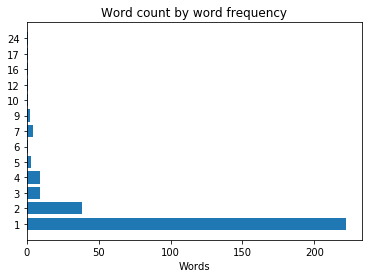

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ranges = [t[0] for t in rangeCounts]
y_pos = np.arange(len(ranges))
words = [t[1] for t in rangeCounts]

plt.barh(y_pos, words)
plt.yticks(y_pos, ranges)
plt.xlabel('Words')
plt.title('Word count by word frequency')

plt.show()